# Algorithms

 In this brief talk we will look into the basics of algorithms, classical examples and their quantum counterparts followed by illustration of these algorithm in qiskit simulator.

Algorithm refers to set of instruction used by Turing machine to perform calculations. Turing machine is the generalisation of every computing device we have. Ideally, every computer(that performs calculation) can be reduced down into Turing machine.

This definition might not strike at first, let's look at some classical examples of algorithms.

## 1. Binary  Search

This is not about finding a binary number(0,1). Rather this algorithm looks for a particular number(target) in a sorted list. Ok, what is a sorted list?

Consider a following list in python. 

In [26]:
import random
MyList = random.sample(range(10, 20), 6)
print(MyList)

[11, 19, 14, 18, 10, 12]


This code snippet produced a list with 6 entries of random numbers. To get a nice list where entries are either in increasing or decreasing order I have to <i>sort</i> the list. Let's sort the list in two ways.

In [31]:
MyListAscending = sorted(MyList, reverse=False)
MyListDescending = sorted(MyList, reverse=True)
print(f"Your list in ascending order is {MyListAscending}")
print(f"Your list in descending order is {MyListDescending}")


Your list in ascending order is [10, 11, 12, 14, 18, 19]
Your list in descending order is [19, 18, 14, 12, 11, 10]


The above two list are sorted list. Now what does binary search do to the above list? So now if someone asks you: I want to find the position of "12" on [10, 11, 12, 14, 18, 19], tell me what to do? You can simply do:

In [34]:
n = 12
position = MyListAscending.index(n)
print(f"The position of  number {n} on the list is {position}")

The position of  number 12 on the list is 2


Again, remember list indices start from 0 not 1! So the cell's output of 2 rather that 3 you might have expected is perfectly fine.

You did this! But that is not the point of this tutorial. You could solve this problem with binary search. So how does this algorithm work?

1. Get the size(length) of sorted list. In our example it would be 5.
2. Get the middle entry. If this is equal to the target, collet its index
3. If target < middle entry, search for target in lower half of list. If target > middle entry, search for target in upper half of list.
4. Repeat 1-3.
5. If found collect it's index

In [42]:
def BinarySearch(YourList: list, target: int, lowest_index: int, highest_index: int):
    if lowest_index <= highest_index:
        middleIndex = lowest_index + highest_index //2
        if YourList[middleIndex] == target:
            return middleIndex
        elif YourList[middleIndex] < target:
            return BinarySearch(MyList, target, middleIndex + 1, highest_index)
        else:
            return BinarySearch(MyList, target, lowest_index, middleIndex - 1)
    else:
        raise Exception("Your List is Empty")


In [47]:
position = BinarySearch(MyListAscending, n, 0, 5)
print(f"The position of {n} is {position}")


The position of 12 is 2


Phew....! You saw binary search implementation. Anyway, my goal here is to show how algorithm works: you give machine a set of instructions(if, else, return,... above) and it gives you some output back. Let's look at one more problem and its associated quantum algorithm.

## Prime Factorisation

Every number can be reduced down to product of primes. For example 24 can be written as: 24 = 2 x 2 x 2 x 3. This is a very small number. Public-key cryptosystem (RSA) relies on time complexity of larger primes classically. This assumption holds all our data secure. However, In 1994 Shor showed that quantum computers could efficiently solve the prime facorisation problem. Anyone with a powerful enough quantum computer can break RSA, at least in theory.  Even though it is impossible to perform this algorithm in hardware, it is interesting to note the following results.


Kleinjung et. al(https://link.springer.com/chapter/10.1007/978-3-642-14623-7_18) factorized 768-bit number. Here 768 bit means a decimal number has 768 bits when written in binary form. For example decimal 4 is 100 in binary and thus decimal 4 is 3-bit number.

<b>Classical</b>: Took 100's of computers for a period of 2 years.

<b>Quantum</b>: 2000-bit number could be factorised using billion qubits and $O(10^{11})$ gates 

## Example: Using Shor's Algorithm for Prime Factorisation

Shor's factorization was removed from qiskit(https://qiskit.org/documentation/migration_guides/algorithms_migration.html). We can look into implementation of another algorithm: Grover's Algorithm

Let's say we have a list from before: [10, 11, 12, 14, 18, 19] and the problem is to pick 12 from it. Now classically for the best case you will get 12 in 1 try and in the worst case you have to try 6 times. Grover's algorithm can solve this problem in $\sqrt(6)$ trial. Don't worry that the square root of 6 is not an integer. The idea is: if it takes you N trial to search something in the worst case classicaly, you can search it in $\sqrt(N)$ trials using quantum computers.

## Functional Parts of Grover Algorithm

1. State Preparation: Build your search space.i.e The region you want to search(the list)
2. Oracle: Flags correct answer(12)
3. Diffusion: Amplifies the probability to obtain right answer(12)

## Example of Grover Algorithm: 2 qubits
### We will follow qiskit tutorial for this one(https://learn.qiskit.org/course/ch-algorithms/grovers-algorithm). I will try to tone down whenever there's anything complex. You should read the textbook for complete description.

For two qubits the definite states are: $| 00 \rangle,  |01 \rangle,  |10 \rangle,  |11 \rangle$. Let's pick which state we want Grover algorithm to pick:  $|11 \rangle$. Initially the chances of measuring this state in superposition state is 0.25 where our search space has size N = 4.

To create initial superposition state:

In [15]:
import qiskit
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister, Aer

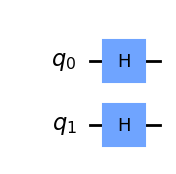

In [21]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.draw("mpl")

The oracle is: $U_w |s \rangle = U_w \frac{1}{4}  \left( | 00 \rangle + |01 \rangle + |10 \rangle + |11 \rangle \right)$ = $\frac{1}{4}  \left( | 00 \rangle + |01 \rangle + |10 \rangle - |11 \rangle \right)$

As you see, the action of oracle is to flip the sign of "win" state. This is control Z gate.

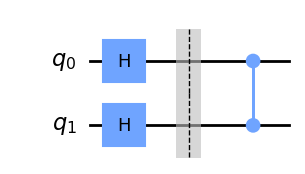

In [22]:
qc.barrier()
qc.cz(0, 1)
qc.draw("mpl")

Now let's add diffuser!

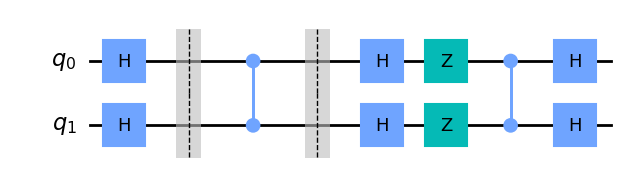

In [23]:
qc.barrier()
qc.h(0)
qc.h(1)
qc.z(0)
qc.z(1)
qc.cz(0,1)
qc.h(0)
qc.h(1)
qc.draw("mpl")

<IPython.core.display.Latex object>

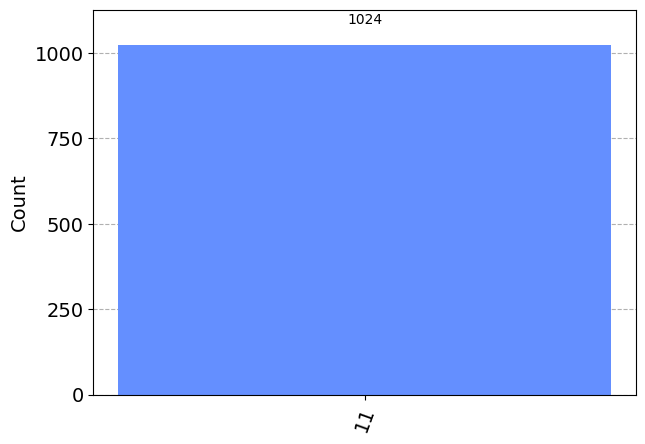

In [24]:
qc.measure_all()
backend = Aer.get_backend('qasm_simulator')
result = backend.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

We got our result in 1 shot! Now whenever you want to search a number you should follow the following prescription:
1. convert numbers to bit
2. prepare quantum circuit
3. apply Grover algorithm
4. measure and be happy